**DESCRIPTION**

Gender Recognition by Voice and Speech Analysis

This database was created to identify a voice as male or female, based upon acoustic properties of the voice and speech. The dataset consists of 3,168 recorded voice samples, collected from male and female speakers. The voice samples are pre-processed by acoustic analysis in R using the seewave and tuneR packages, with an analyzed frequency range of 0hz-280hz (human vocal range).





The Dataset


The following acoustic properties of each voice are measured and included within the CSV:

1. meanfreq: mean frequency (in kHz)
2. sd: standard deviation of frequency
3. median: median frequency (in kHz)
4. Q25: first quantile (in kHz)
5. Q75: third quantile (in kHz)
6. IQR: interquantile range (in kHz)
7. skew: skewness (see note in specprop description)
8. kurt: kurtosis (see note in specprop description)
9. sp.ent: spectral entropy
10. sfm: spectral flatness
11. mode: mode frequency
12. centroid: frequency centroid (see specprop)
13. peakf: peak frequency (frequency with highest energy)
14. meanfun: average of fundamental frequency measured across acoustic signal
15. minfun: minimum fundamental frequency measured across acoustic signal
16. maxfun: maximum fundamental frequency measured across acoustic signal
17. meandom: average of dominant frequency measured across acoustic signal
18. mindom: minimum of dominant frequency measured across acoustic signal
19. maxdom: maximum of dominant frequency measured across acoustic signal
20. dfrange: range of dominant frequency measured across acoustic signal
21. modindx: modulation index. Calculated as the accumulated absolute difference between adjacent measurements of fundamental frequencies divided by the frequency range
22. label: male or female


LET'S GET STARTED!!

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**DATA VISUALIZATION**

Importing the libraries necessary to visualize the data and loading the dataset.

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
voice = pd.read_csv("/content/drive/My Drive/dataset/voice.csv")

In [22]:
voice

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,0.200836,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,0.013683,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,0.008006,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,0.212202,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female


As we can see, the dataset contains 3168 rows and 21 columns of data. Each column except the last one, has a numerical value which represents an acoustic property which collectively determine the gender of the voice.
The last column contains categorical data i.e two classes of data, Male and female.Therefore it is a binary classification dataset.

male      1584
female    1584
Name: label, dtype: int64


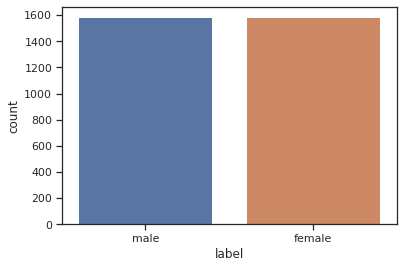

In [23]:
print(voice['label'].value_counts())
sns.countplot(x='label', data=voice)
plt.show()

This plot shows the counts of observations in each categorical class using bars.We can see that the dataset is equally divided into male and female classes with 1584 instances of each class.

**Violin Plot for Data Analysis**

A violin plot shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared. Wider sections of the violin plot represent a higher probability of observations taking a given value, the thinner sections correspond to a lower probability.





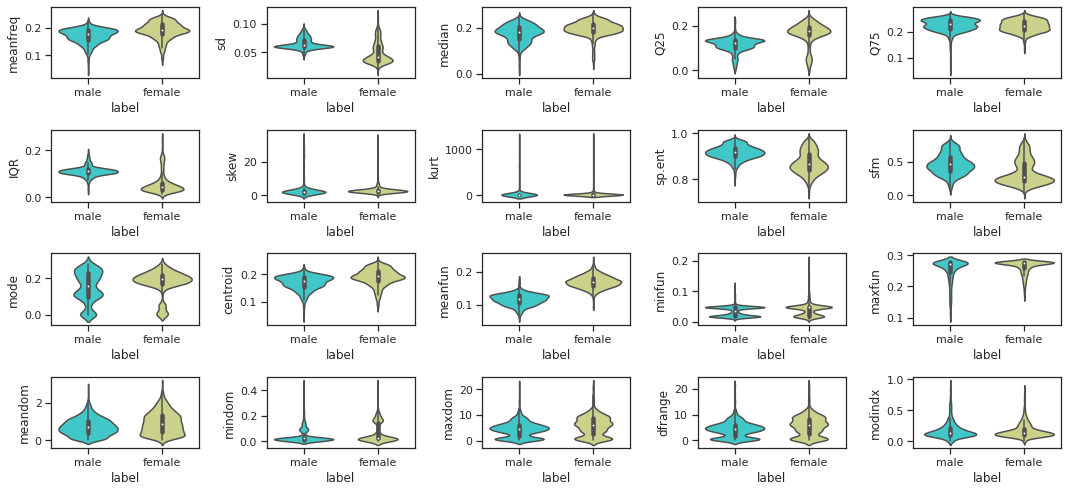

In [24]:
list = ['meanfreq','sd','median','Q25','Q75','IQR','skew','kurt','sp.ent','sfm','mode','centroid','meanfun','minfun','maxfun','meandom','mindom','maxdom','dfrange','modindx']
fig= plt.figure(figsize=(15,7))
for i in range(20):
  plt.subplot(4,5,i+1)
  sns.violinplot(x="label", y= voice[list[i]], data=voice  ,palette='rainbow')
  fig.tight_layout()
plt.show()

We can visualize the full distribution of the data here.
We can observe that features like IQR, meanfun etc have different probability of observations for male and female or they are easily seperable.It means that these features are correlated well with the target i.e label.If we look that the meanfun vs label plot, we can concur that the average of frequency of the acoustic signal is higher for the female voice whereas that of male is lower.
Similarly in the IQR vs label plot, the Interquartile range (IQR) is higher for the male voice.

We can see that the plot for both male and female look similar for the features median ,maxdom, mindom ,dfrange, meandom , mode , maxfun , minfun, modindx, skew, Q75, kurt etc. For example, in the kurt graph, the kurtosis appears to lie in the same range for most of the male and female voices.Similarly skewness also shows the same case and is not easily seperable.This means that they have the similar probability of observations for male and female i.e they have lower correlation our target which is the label.

We can drop some of the lower correlated features which might result in better accuracy in our models.



**Correlation using Heatmap**



In [0]:
voice['label']  = voice['label'].astype('category').cat.codes

After we convert the  categorical data to numerical i.e Male/Female to 1/0, our dataset looks like this.

In [31]:
voice.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1


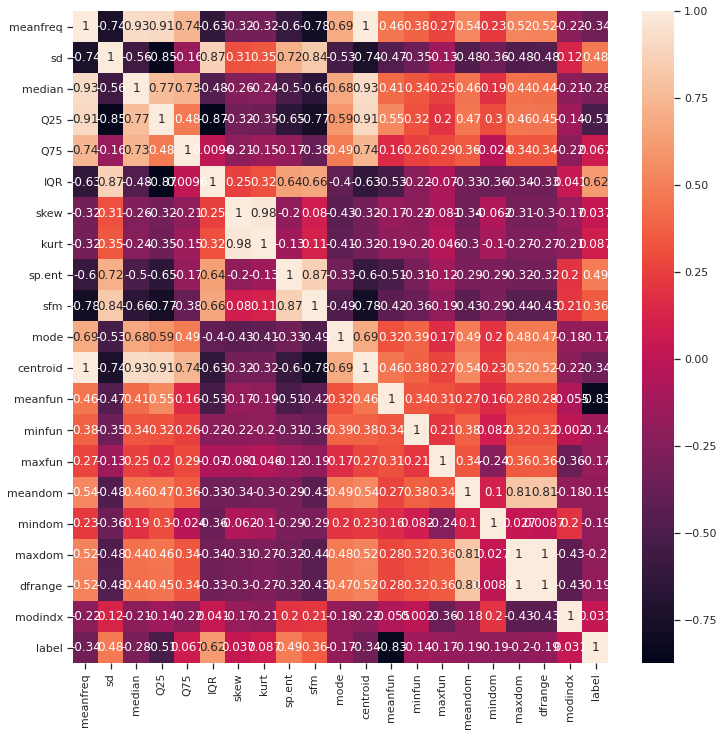

In [28]:
plt.figure(figsize = (12,12))
sns.heatmap(voice.corr(), annot=True)

A heatmap is a graphical representation of data that uses a system of color-coding to represent different values.It shows the correlation of all the features with respect to our target variable.The whiter subplots represent better positive correlation whereas the darker ones show negative correlation.

In [29]:
corr_voice = voice.corr('pearson')
corr_voice['label'].sort_values()

meanfun    -0.833921
Q25        -0.511455
meanfreq   -0.337415
centroid   -0.337415
median     -0.283919
maxdom     -0.195657
mindom     -0.194974
dfrange    -0.192213
meandom    -0.191067
mode       -0.171775
maxfun     -0.166461
minfun     -0.136692
modindx     0.030801
skew        0.036627
Q75         0.066906
kurt        0.087195
sfm         0.357499
sd          0.479539
sp.ent      0.490552
IQR         0.618916
label       1.000000
Name: label, dtype: float64

**Visualization using sns pairplot**

This plot shows the pairwise relationships in a dataset.

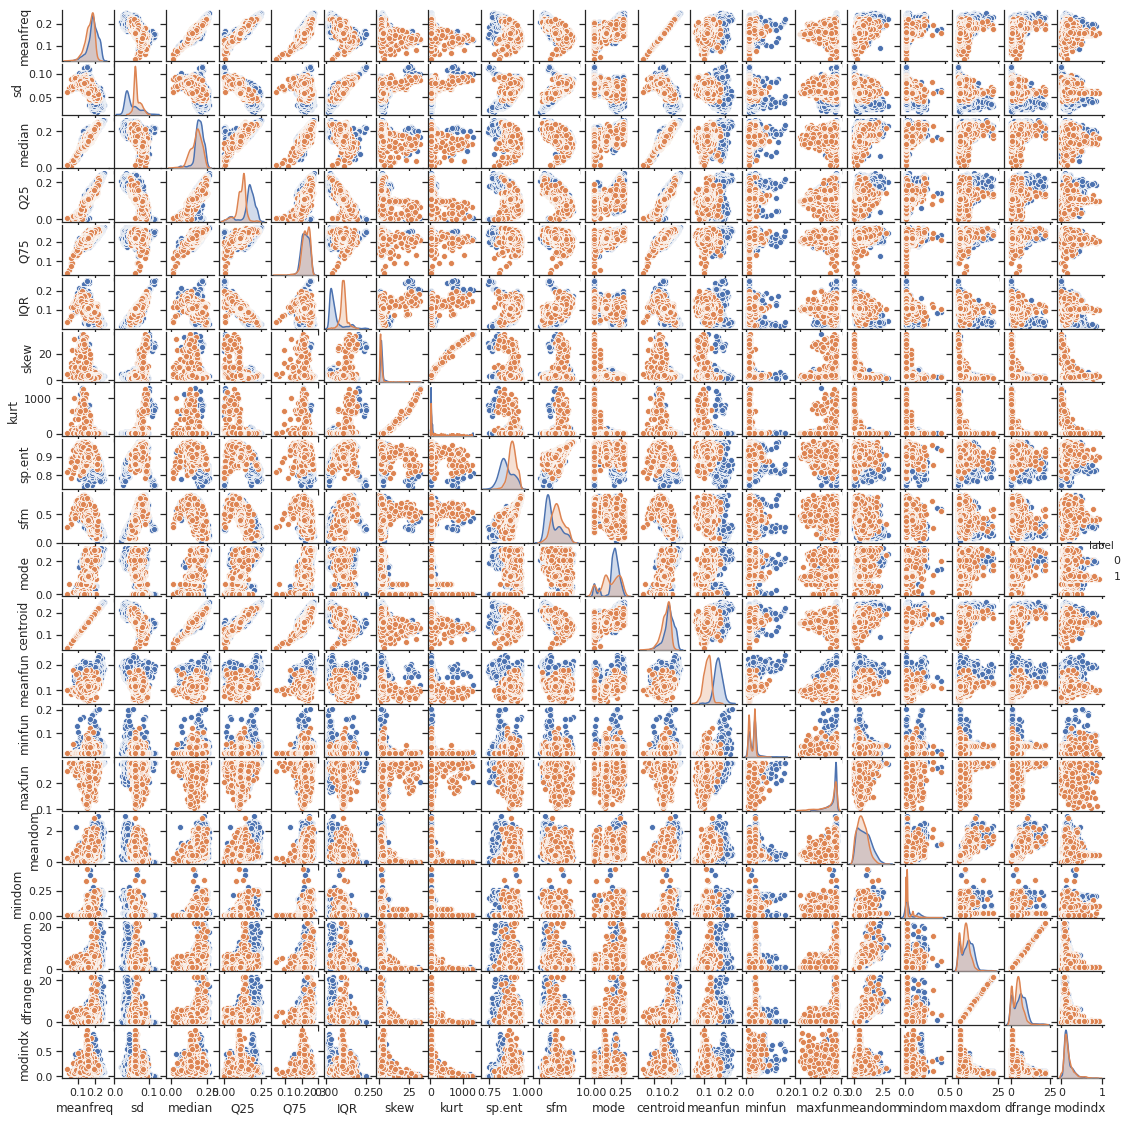

In [30]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(voice, hue = "label")
g.fig.set_size_inches(15,15)

Here we can observe the relationship of each feature with every other feature. The positive and negative correlations can be seen in this plot.

Now we have a general idea as to what gender recognistion data set contains an how the data is distributed and correlated.Let's build our model!!